In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statistics
from sklearn.tree import DecisionTreeClassifier as dtc

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data = drive.CreateFile({'id': '1Wnnp5B62JxZxM6TU5lZeL9LEwP1bpVn7'}) #https://drive.google.com/file/d/1Wnnp5B62JxZxM6TU5lZeL9LEwP1bpVn7/view?usp=sharing
data.GetContentFile('MLA1Q3data.csv')
data3 = pd.read_csv('MLA1Q3data.csv')

In [5]:
data3.fillna(value=data3['pm2.5'].mean(),inplace=True)
del data3['No']  #removing "No" column
del data3['year']
del data3['day']
del data3['hour']
data3['cbwd']=pd.factorize(data3['cbwd'])[0]+1  #converting "cbwd" string values to factors
data3

,month,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,98.613215,-21,-11.0,1021.0,1,1.79,0,0
1,1,98.613215,-21,-12.0,1020.0,1,4.92,0,0
2,1,98.613215,-21,-11.0,1019.0,1,6.71,0,0
3,1,98.613215,-21,-14.0,1019.0,1,9.84,0,0
4,1,98.613215,-20,-12.0,1018.0,1,12.97,0,0
...,...,...,...,...,...,...,...,...,...
43819,12,8.000000,-23,-2.0,1034.0,1,231.97,0,0
43820,12,10.000000,-22,-3.0,1034.0,1,237.78,0,0
43821,12,10.000000,-22,-3.0,1034.0,1,242.70,0,0
43822,12,8.000000,-22,-4.0,1034.0,1,246.72,0,0


In [6]:
data3.isnull().sum()

month    0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [7]:
def Train_Test_Split(df):
  train_size = int(0.8 * len(df))

  train_set = df[:train_size]
  test_set = df[train_size:]
  return train_set,test_set

In [8]:
X_train,X_test=Train_Test_Split(data3.iloc[:,1:])

In [9]:
y_train,y_test=Train_Test_Split(data3.iloc[:,:1])

# **Answer to Q3(a)**

In [10]:
#Using Gini-Index
cls=dtc(criterion='gini')
cls.fit(X_train,y_train)
y_pred=cls.predict(X_test)
y_test1=np.array(y_test)
y_test1 = (y_test1).reshape(-1)
df_confusion = pd.crosstab(y_test1, y_pred)
t_val=0
f_val=0
for i in range(1,13):
  for j in range(1,13):
    if i==j:
      t_val+=df_confusion[i][j]
    else:
      f_val+=df_confusion[i][j]
accuracy=t_val/(f_val+t_val)
accuracy

0.3869937250427838

In [11]:
#Using Entropy
cls=dtc(criterion='entropy')
cls.fit(X_train,y_train)
y_pred=cls.predict(X_test)
y_test1=np.array(y_test)
y_test1 = (y_test1).reshape(-1)
df_confusion = pd.crosstab(y_test1, y_pred)
t_val=0
f_val=0
for i in range(1,13):
  for j in range(1,13):
    if i==j:
      t_val+=df_confusion[i][j]
    else:
      f_val+=df_confusion[i][j]
accuracy=t_val/(f_val+t_val)
accuracy

0.3869937250427838

# **Answer to Q3(b)**

In [12]:
#testing accuracies
depths = [2,4,8,10,15,30]
accvals = []
for d in depths:
  cls=dtc(criterion='entropy',max_depth=d)
  cls=cls.fit(X_train,y_train)
  y_pred = cls.predict(X_test)
  y_test2 = np.array(y_test)
  y_test2 = (y_test2).reshape(-1)
  accuracy = np.sum(y_pred == y_test2)/len(y_pred)
  accvals.append(accuracy)
accvals

[0.24244152880775813,
 0.3486594409583571,
 0.42920707358813465,
 0.4296634341129492,
 0.3925841414717627,
 0.3898459783228751]

In [13]:
depths = [2,4,8,10,15,30]
table=np.vstack((depths, accvals)).T
table_df=pd.DataFrame(table,columns=["Depths","Testing_Accuracy"])
table_df

,Depths,Testing_Accuracy
0,2.0,0.242442
1,4.0,0.348659
2,8.0,0.429207
3,10.0,0.429663
4,15.0,0.392584
5,30.0,0.389846


In [14]:
#training accuracies
depths = [2,4,8,10,15,30]
accvals2 = []
for d in depths:
  cls=dtc(criterion='entropy',max_depth=d)
  cls=cls.fit(X_train,y_train)
  y_pred2 = cls.predict(X_train)
  y_train2 = np.array(y_train)
  y_train2 = (y_train2).reshape(-1)
  accuracy = np.sum(y_pred2 == y_train2)/len(y_pred2)
  accvals2.append(accuracy)
accvals2

[0.2879717048404119,
 0.39747283151259305,
 0.5340140905331013,
 0.6135942268746969,
 0.8649990016828775,
 0.999885906614564]

In [15]:
trainacc = pd.DataFrame(accvals2)
table_df['Training_Accuracy'] = trainacc 
table_df

,Depths,Testing_Accuracy,Training_Accuracy
0,2.0,0.242442,0.287972
1,4.0,0.348659,0.397473
2,8.0,0.429207,0.534014
3,10.0,0.429663,0.613594
4,15.0,0.392584,0.864999
5,30.0,0.389846,0.999886


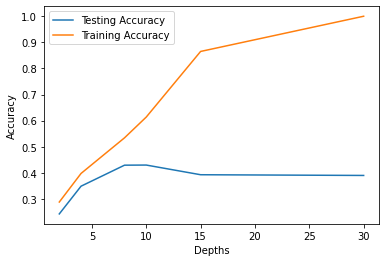

In [16]:
plt.plot(table_df['Depths'],table_df['Testing_Accuracy'], label = 'Testing Accuracy')
plt.plot(table_df['Depths'],table_df['Training_Accuracy'], label = 'Training Accuracy')
plt.xlabel('Depths')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Answer to Q3(c)**

In [17]:
sampdf = X_train.iloc[:,:8]
sampdf['month'] = y_train
sampdf

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,month
0,98.613215,-21,-11.0,1021.0,1,1.79,0,0,1
1,98.613215,-21,-12.0,1020.0,1,4.92,0,0,1
2,98.613215,-21,-11.0,1019.0,1,6.71,0,0,1
3,98.613215,-21,-14.0,1019.0,1,9.84,0,0,1
4,98.613215,-20,-12.0,1018.0,1,12.97,0,0,1
...,...,...,...,...,...,...,...,...,...
35054,22.000000,-19,9.0,1011.0,1,73.31,0,0,12
35055,19.000000,-18,9.0,1012.0,1,83.14,0,0,12
35056,16.000000,-18,9.0,1012.0,1,92.97,0,0,12
35057,21.000000,-19,8.0,1012.0,1,102.80,0,0,12


In [18]:
output = []
Xtrain_df = sampdf
for i in range(100):
    newdf = Xtrain_df.sample(frac=0.5, replace=True, random_state=1).reset_index(drop=True)
    X_train_new = newdf.drop('month',axis=1)
    y_train_new = newdf['month']
    cls1=dtc(criterion='entropy',max_depth=3)
    cls1=cls1.fit(X_train_new,y_train_new)
    output.append(cls1.predict(X_test))

In [19]:
majorityOutput = []
output = np.array(output)
temp = np.transpose(output)
#len(temp)
for i in range(temp.shape[0]):
    majorityOutput.append(statistics.mode(temp[i]))
    #np.bincount(temp[i]).argmax()

In [20]:
y_test_new = np.array(y_test)
y_test_new = (y_test_new).reshape(-1)
#len(y_test_new)
accuracy=np.sum(majorityOutput == y_test_new)/len(majorityOutput)
accuracy

0.3147746719908728

# **Answer to Q3(d)**

In [23]:
def EnsembleMethod(tr,dp):   #tr for number of trees and dp for depth
    outputs = []
    for i in range(tr):
        newdf2 = sampdf.sample(frac=1)
        train_size = int(0.5 * len(newdf2))
        XTrain = newdf2.drop('month',axis=1)
        XTrain = X_train_new[:train_size]
        yTrain = newdf2['month']
        yTrain = y_train_new[:train_size]
        cls2 = dtc(criterion='entropy',max_depth=dp)
        cls2 = cls2.fit(XTrain,yTrain)
        outputs.append(cls2.predict(X_test))
    finalOutput = []
    temp2 = np.transpose(outputs)
    for i in range(temp2.shape[0]):
        finalOutput.append(np.bincount(temp2[i]).argmax())
    yTest = np.array(y_test)
    yTest = (yTest).reshape(-1)
    accuracy = np.sum(finalOutput == yTest)/len(finalOutput)
    return accuracy

In [24]:
depths = [4, 8, 10, 15, 20,30]
trees = [75,100,150,300,500,1000]
acc = []; tr = []; dp = []
for dep in depths:
    for t in trees:
        dp.append(dep)
        tr.append(t)
        accuracy = EnsembleMethod(t, dep)
        acc.append(accuracy)        

In [25]:
Trees = pd.DataFrame(tr)
Depth = pd.DataFrame(dp)
Accuracy = pd.DataFrame(acc)
ensemble_df = pd.DataFrame(index = range(36))
ensemble_df['Depths'] = Depth
ensemble_df['Trees'] = Trees
ensemble_df['Testing_Accuracy'] = Accuracy
ensemble_df

,Depths,Trees,Testing_Accuracy
0,4,75,0.378095
1,4,100,0.378095
2,4,150,0.378095
3,4,300,0.378095
4,4,500,0.378095
5,4,1000,0.378095
6,8,75,0.418254
7,8,100,0.416429
8,8,150,0.416771
9,8,300,0.416771


In [28]:
def EnsembleMethod2(tr,dp):   #tr for number of trees and dp for depth
    outputs = []
    for i in range(tr):
        newdf2 = sampdf.sample(frac=1)
        train_size = int(0.5 * len(newdf2))
        XTrain = newdf2.drop('month',axis=1)
        XTrain = X_train_new[:train_size]
        yTrain = newdf2['month']
        yTrain = y_train_new[:train_size]
        cls2 = dtc(criterion='entropy',max_depth=dp)
        cls2 = cls2.fit(XTrain,yTrain)
        outputs.append(cls2.predict(X_train))
    finalOutput = []
    temp2 = np.transpose(outputs)
    for i in range(temp2.shape[0]):
        finalOutput.append(np.bincount(temp2[i]).argmax())
    yTest = np.array(y_train)
    yTest = (yTest).reshape(-1)
    accuracy = np.sum(finalOutput == yTest)/len(finalOutput)
    return accuracy

In [31]:
depths = [4, 8, 10, 15, 20,30]
trees = [75,100,150,300,500,1000]
acc2 = []; tr2 = []; dp2 = []
for dep in depths:
    for t in trees:
        dp2.append(dep)
        tr2.append(t)
        accuracy2 = EnsembleMethod2(t, dep)
        acc2.append(accuracy2)       

In [32]:
ensemble_df['Training_Accuracy'] = pd.DataFrame(acc2)
ensemble_df

,Depths,Trees,Testing_Accuracy,Training_Accuracy
0,4,75,0.378095,0.400439
1,4,100,0.378095,0.400439
2,4,150,0.378095,0.400439
3,4,300,0.378095,0.400439
4,4,500,0.378095,0.400439
5,4,1000,0.378095,0.400439
6,8,75,0.418254,0.520494
7,8,100,0.416429,0.520152
8,8,150,0.416771,0.520380
9,8,300,0.416771,0.520665


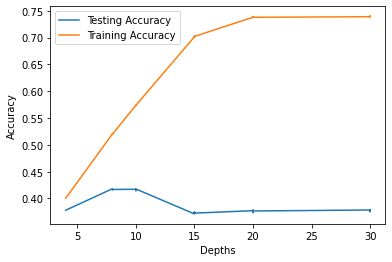

In [33]:
plt.plot(ensemble_df['Depths'],ensemble_df['Testing_Accuracy'], label = 'Testing Accuracy')
plt.plot(ensemble_df['Depths'],ensemble_df['Training_Accuracy'], label = 'Training Accuracy')
plt.xlabel('Depths')
plt.ylabel('Accuracy')
plt.legend()
plt.show()